# DE PROJECT NETW908
# Name - Omar Ashraf Hosni 
# ID - 43-3764
# Major - Networks

## Data extraction

In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
api_key = 'pk_0f2329e90b7c4eaf878a2dbb03684ab0' # put your own API key
stocks = ['HAL','AAPL','TSLA','HPQ','ICE','ISRG','IVZ','MTD','MRNA','NVDA']

In [2]:

url_batch = f'https://cloud.iexapis.com/stable/stock/market/batch?symbols={stocks}&types=chart&range=Q12021&token={api_key}'
batch = requests.get(url_batch).json()

In [3]:
type(batch),batch.keys()

(dict,
 dict_keys(['HAL', 'AAPL', 'TSLA', 'HPQ', 'ICE', 'ISRG', 'IVZ', 'MTD', 'MRNA', 'NVDA']))

In [4]:
type(batch['HAL'])

dict

In [5]:
batch

{'HAL': {'chart': [{'close': 18.83,
    'high': 19.47,
    'low': 18.57,
    'open': 19.22,
    'symbol': 'HAL',
    'volume': 8898853,
    'id': 'HISTORICAL_PRICES',
    'key': 'HAL',
    'subkey': '',
    'date': '2021-01-04',
    'updated': 1638930107000,
    'changeOverTime': 0,
    'marketChangeOverTime': 0,
    'uOpen': 19.22,
    'uClose': 18.83,
    'uHigh': 19.47,
    'uLow': 18.57,
    'uVolume': 8898853,
    'fOpen': 19.1028,
    'fClose': 18.7152,
    'fHigh': 19.3513,
    'fLow': 18.4568,
    'fVolume': 8898853,
    'label': 'Jan 4, 21',
    'change': 0,
    'changePercent': 0},
   {'close': 20.41,
    'high': 20.99,
    'low': 19.01,
    'open': 19.17,
    'symbol': 'HAL',
    'volume': 15912302,
    'id': 'HISTORICAL_PRICES',
    'key': 'HAL',
    'subkey': '',
    'date': '2021-01-05',
    'updated': 1638930104000,
    'changeOverTime': 0.08390865639936282,
    'marketChangeOverTime': 0.08390865639936282,
    'uOpen': 19.17,
    'uClose': 20.41,
    'uHigh': 20.99,
    

In [6]:
batch['HAL']['chart'][0].keys()

dict_keys(['close', 'high', 'low', 'open', 'symbol', 'volume', 'id', 'key', 'subkey', 'date', 'updated', 'changeOverTime', 'marketChangeOverTime', 'uOpen', 'uClose', 'uHigh', 'uLow', 'uVolume', 'fOpen', 'fClose', 'fHigh', 'fLow', 'fVolume', 'label', 'change', 'changePercent'])

In [7]:
dict_batch = {'symbol':[],'open':[],'close':[],'high':[], 'low':[], 'volume':[], 'changePercent':[], 'date':[]}
for symbol in batch.keys():
    # we then loop over each element in the chart of the symbol and plug in the data into the dictionary
    for row in batch[symbol]['chart']:
        dict_batch['close'].append(row['close'])
        dict_batch['open'].append(row['open'])
        dict_batch['date'].append(row['date'])
        dict_batch['symbol'].append(row['symbol'])
        dict_batch['high'].append(row['high'])
        dict_batch['low'].append(row['low'])
        dict_batch['volume'].append(row['volume'])
        dict_batch['changePercent'].append(row['changePercent'])
dict_batch

{'symbol': ['HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'HAL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
  'AAPL',
 

In [8]:
df_batch = pd.DataFrame(dict_batch)
df_batch

,symbol,open,close,high,low,volume,changePercent,date
0,HAL,19.2200,18.8300,19.4700,18.5700,8898853.0,0.0000,2021-01-04
1,HAL,19.1700,20.4100,20.9900,19.0100,15912302.0,0.0839,2021-01-05
2,HAL,20.9300,20.8200,21.0400,20.5100,16165092.0,0.0201,2021-01-06
3,HAL,20.9700,20.3500,21.2100,20.2000,13680458.0,-0.0226,2021-01-07
4,HAL,20.6800,20.1200,20.6800,19.8700,8343295.0,-0.0113,2021-01-08
5,HAL,19.3800,20.5700,20.6900,19.2700,11413381.0,0.0224,2021-01-11
6,HAL,20.8900,22.1300,22.2300,20.6700,15816250.0,0.0758,2021-01-12
7,HAL,21.9700,21.5700,21.9900,21.3900,10586575.0,-0.0253,2021-01-13
8,HAL,21.6300,21.7600,22.1900,21.5600,10215376.0,0.0088,2021-01-14
9,HAL,21.2900,20.7400,21.4500,20.4400,12252399.0,-0.0469,2021-01-15


In [9]:
#now we will have another request to fetch the data regarding the company name and sector 
#which weren't available in first request
url_company = f'https://cloud.iexapis.com/stable/stock/market/batch?symbols={stocks}&types=company&token={api_key}'
company_info = requests.get(url_company).json()
company_info.keys(), company_info['HAL']['company'].keys()

(dict_keys(['HAL', 'AAPL', 'TSLA', 'HPQ', 'ICE', 'ISRG', 'IVZ', 'MTD', 'MRNA', 'NVDA']),
 dict_keys(['symbol', 'companyName', 'exchange', 'industry', 'website', 'description', 'CEO', 'securityName', 'issueType', 'sector', 'primarySicCode', 'employees', 'tags', 'address', 'address2', 'state', 'city', 'zip', 'country', 'phone']))

In [10]:
#we will have a dictionary with the symbols as the key, and in each key we will have 
#a dictionary holding the Company Name and sector
info = {}
for symbol in company_info.keys():
    temp={'companyName': "", 'sector': "" }
    temp['companyName']= company_info[symbol]['company']['companyName']
    temp['sector']= company_info[symbol]['company']['sector']
    info[symbol]= temp
info

{'HAL': {'companyName': 'Halliburton Co.',
  'sector': 'Mining, Quarrying, and Oil and Gas Extraction'},
 'AAPL': {'companyName': 'Apple Inc', 'sector': 'Manufacturing'},
 'TSLA': {'companyName': 'Tesla Inc', 'sector': 'Manufacturing'},
 'HPQ': {'companyName': 'HP Inc', 'sector': 'Manufacturing'},
 'ICE': {'companyName': 'Intercontinental Exchange Inc',
  'sector': 'Finance and Insurance'},
 'ISRG': {'companyName': 'Intuitive Surgical Inc', 'sector': 'Manufacturing'},
 'IVZ': {'companyName': 'Invesco Ltd', 'sector': 'Finance and Insurance'},
 'MTD': {'companyName': 'Mettler-Toledo International, Inc.',
  'sector': 'Manufacturing'},
 'MRNA': {'companyName': 'Moderna Inc', 'sector': 'Manufacturing'},
 'NVDA': {'companyName': 'NVIDIA Corp', 'sector': 'Manufacturing'}}

In [11]:
#we will now add two columns to df_batch which are company name and sector
df_batch['companyName'] = ""
df_batch['sector']= ""

#we will now loop on the dataframe and look at the symbol of each entry and use it to retrieve the companyName 
#and sector from the info dictionary
for i in range(0,len(df_batch)):
    df_batch['companyName'].iloc[i]= info[df_batch['symbol'].iloc[i]]['companyName']
    df_batch['sector'].iloc[i]= info[df_batch['symbol'].iloc[i]]['sector']
    
#we will save the dataframe to a csv file
df_batch.to_csv('SavedDataframe.csv')



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
stocks = ['HAL','AAPL','TSLA','HPQ','ICE','ISRG','IVZ','MTD','MRNA','NVDA']
Saved_df=pd.read_csv('SavedDataframe.csv')
Saved_df=Saved_df.iloc[0:,1:]
Saved_df

,symbol,open,close,high,low,volume,changePercent,date,companyName,sector
0,HAL,19.2200,18.8300,19.4700,18.5700,8898853.0,0.0000,2021-01-04,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
1,HAL,19.1700,20.4100,20.9900,19.0100,15912302.0,0.0839,2021-01-05,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
2,HAL,20.9300,20.8200,21.0400,20.5100,16165092.0,0.0201,2021-01-06,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
3,HAL,20.9700,20.3500,21.2100,20.2000,13680458.0,-0.0226,2021-01-07,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
4,HAL,20.6800,20.1200,20.6800,19.8700,8343295.0,-0.0113,2021-01-08,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
5,HAL,19.3800,20.5700,20.6900,19.2700,11413381.0,0.0224,2021-01-11,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
6,HAL,20.8900,22.1300,22.2300,20.6700,15816250.0,0.0758,2021-01-12,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
7,HAL,21.9700,21.5700,21.9900,21.3900,10586575.0,-0.0253,2021-01-13,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
8,HAL,21.6300,21.7600,22.1900,21.5600,10215376.0,0.0088,2021-01-14,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
9,HAL,21.2900,20.7400,21.4500,20.4400,12252399.0,-0.0469,2021-01-15,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"


### First and last 5 rows and general info about the dataframe

In [2]:
Saved_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 10 columns):
symbol           610 non-null object
open             610 non-null float64
close            610 non-null float64
high             610 non-null float64
low              610 non-null float64
volume           610 non-null float64
changePercent    610 non-null float64
date             610 non-null object
companyName      610 non-null object
sector           610 non-null object
dtypes: float64(6), object(4)
memory usage: 47.7+ KB


In [3]:
Saved_df.head(5)

,symbol,open,close,high,low,volume,changePercent,date,companyName,sector
0,HAL,19.22,18.83,19.47,18.57,8898853.0,0.0000,2021-01-04,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
1,HAL,19.17,20.41,20.99,19.01,15912302.0,0.0839,2021-01-05,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
2,HAL,20.93,20.82,21.04,20.51,16165092.0,0.0201,2021-01-06,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
3,HAL,20.97,20.35,21.21,20.20,13680458.0,-0.0226,2021-01-07,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
4,HAL,20.68,20.12,20.68,19.87,8343295.0,-0.0113,2021-01-08,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"


In [4]:
Saved_df.tail(5)

,symbol,open,close,high,low,volume,changePercent,date,companyName,sector
605,NVDA,124.9950,125.3525,127.1475,122.720,29514456.0,-0.0085,2021-03-25,NVIDIA Corp,Manufacturing
606,NVDA,125.5450,128.3925,128.5625,123.735,36396896.0,0.0243,2021-03-26,NVIDIA Corp,Manufacturing
607,NVDA,128.2025,129.4825,130.6250,127.000,27351988.0,0.0085,2021-03-29,NVIDIA Corp,Manufacturing
608,NVDA,128.4195,128.7175,129.7525,127.050,20020248.0,-0.0059,2021-03-30,NVIDIA Corp,Manufacturing
609,NVDA,130.1550,133.4825,134.7050,129.825,31477752.0,0.0370,2021-03-31,NVIDIA Corp,Manufacturing


## Data cleaning

In [5]:
Saved_df['open']=Saved_df['open'].round(decimals=2)
Saved_df['close']=Saved_df['close'].round(decimals=2)
Saved_df['high']=Saved_df['high'].round(decimals=2)
Saved_df['low']=Saved_df['low'].round(decimals=2)
Saved_df.head(5)

,symbol,open,close,high,low,volume,changePercent,date,companyName,sector
0,HAL,19.22,18.83,19.47,18.57,8898853.0,0.0000,2021-01-04,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
1,HAL,19.17,20.41,20.99,19.01,15912302.0,0.0839,2021-01-05,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
2,HAL,20.93,20.82,21.04,20.51,16165092.0,0.0201,2021-01-06,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
3,HAL,20.97,20.35,21.21,20.20,13680458.0,-0.0226,2021-01-07,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
4,HAL,20.68,20.12,20.68,19.87,8343295.0,-0.0113,2021-01-08,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"


In [6]:
Saved_df.changePercent = Saved_df.changePercent.mul(100).round(decimals=2)
Saved_df.head(5)

,symbol,open,close,high,low,volume,changePercent,date,companyName,sector
0,HAL,19.22,18.83,19.47,18.57,8898853.0,0.00,2021-01-04,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
1,HAL,19.17,20.41,20.99,19.01,15912302.0,8.39,2021-01-05,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
2,HAL,20.93,20.82,21.04,20.51,16165092.0,2.01,2021-01-06,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
3,HAL,20.97,20.35,21.21,20.20,13680458.0,-2.26,2021-01-07,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"
4,HAL,20.68,20.12,20.68,19.87,8343295.0,-1.13,2021-01-08,Halliburton Co.,"Mining, Quarrying, and Oil and Gas Extraction"


## Correlation co-efficent

In [7]:
#We will create a dictionary where we will add the dataframe corresponding to each symbol(Stock)
stocks_dict={}
for stock in stocks:
    stocks_dict[stock]= Saved_df[Saved_df['symbol'].str.contains(stock)]
stocks_dict

{'HAL':    symbol   open  close   high    low      volume  changePercent        date  \
 0     HAL  19.22  18.83  19.47  18.57   8898853.0           0.00  2021-01-04   
 1     HAL  19.17  20.41  20.99  19.01  15912302.0           8.39  2021-01-05   
 2     HAL  20.93  20.82  21.04  20.51  16165092.0           2.01  2021-01-06   
 3     HAL  20.97  20.35  21.21  20.20  13680458.0          -2.26  2021-01-07   
 4     HAL  20.68  20.12  20.68  19.87   8343295.0          -1.13  2021-01-08   
 5     HAL  19.38  20.57  20.69  19.27  11413381.0           2.24  2021-01-11   
 6     HAL  20.89  22.13  22.23  20.67  15816250.0           7.58  2021-01-12   
 7     HAL  21.97  21.57  21.99  21.39  10586575.0          -2.53  2021-01-13   
 8     HAL  21.63  21.76  22.19  21.56  10215376.0           0.88  2021-01-14   
 9     HAL  21.29  20.74  21.45  20.44  12252399.0          -4.69  2021-01-15   
 10    HAL  21.11  20.54  21.35  20.30  16808936.0          -0.96  2021-01-19   
 11    HAL  21.39  20

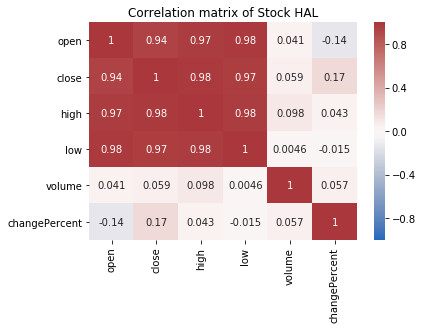

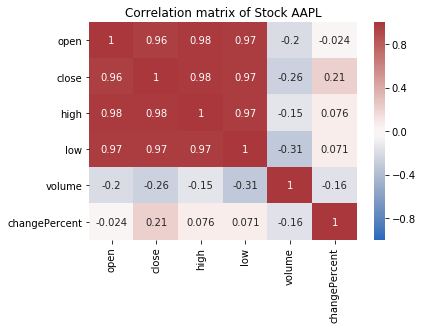

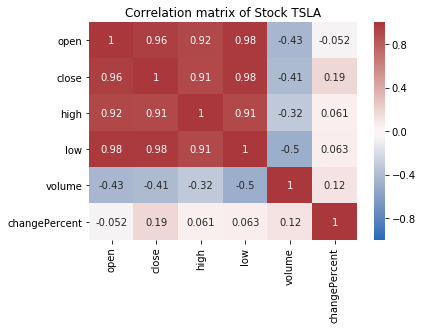

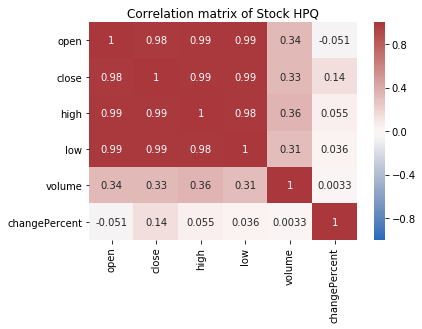

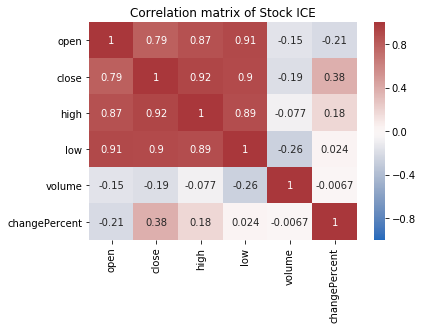

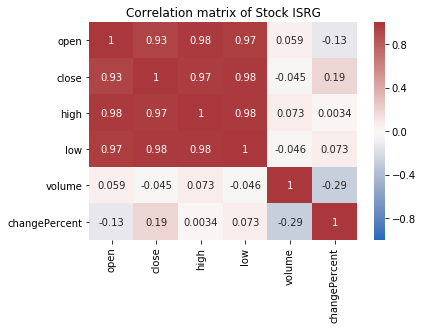

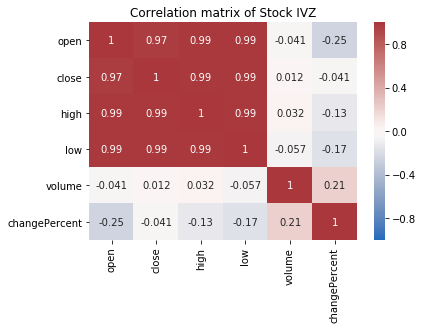

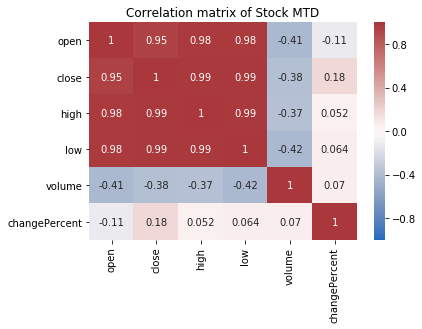

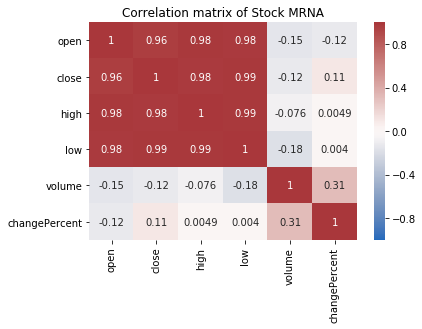

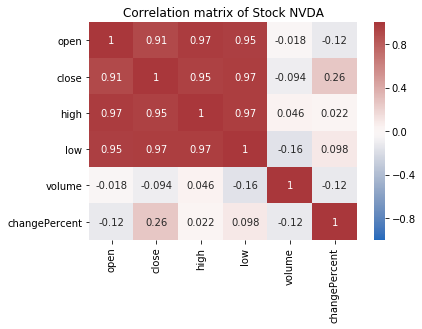

In [8]:
#here we will get the correlation matrix for each dataframe corresponding to one stock and add
#it in our already created dictionary
for stock in stocks:
    stocks_dict[stock]= stocks_dict[stock].corr()

#here we will display each correlation matrix

for stock in stocks:
    hm= sns.heatmap(stocks_dict[stock], annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
    s="Correlation matrix of Stock "+ stock
    hm.set(title = s )
    plt.show()


In [9]:
#here we will extract only the column of correlation coefficient of close with the other varibales
for stock in stocks:
    df=stocks_dict[stock]['close']
    s="Correlation coefficient between close and the other features of Stock "+ stock
    print(s)
    print(df)
    

Correlation coefficient between close and the other features of Stock HAL
open             0.939089
close            1.000000
high             0.982109
low              0.966559
volume           0.058865
changePercent    0.168411
Name: close, dtype: float64
Correlation coefficient between close and the other features of Stock AAPL
open             0.958645
close            1.000000
high             0.977580
low              0.973048
volume          -0.260390
changePercent    0.211662
Name: close, dtype: float64
Correlation coefficient between close and the other features of Stock TSLA
open             0.958881
close            1.000000
high             0.910683
low              0.981322
volume          -0.412515
changePercent    0.186133
Name: close, dtype: float64
Correlation coefficient between close and the other features of Stock HPQ
open             0.976758
close            1.000000
high             0.987199
low              0.989188
volume           0.325242
changePercent    0.1

### Findings and conclusions - 
It is clear that the close variable is highly correlated with the open, high and low variables in all types of stocks,
as for almost all the stocks the correlation coefficient between close and the mentioned variables is above 0.9 which means that as the close increases the open, high and low variables increase accordingly.

On the other hand, close variable has a weak correlation with the ChangePercent and the volume variables due to low values for the correlation coefficients in nearly all the stocks, which means that close is uncorrelated with the volume and the changePercent.

## Variable transformation

In [10]:
#knowing the categorical columns
catCols = [col for col in Saved_df.columns if Saved_df[col].dtype=="O"]
catCols

['symbol', 'date', 'companyName', 'sector']

In [11]:
# we will now use One Hot Encoding to transform Categorical variables into numerical variables
new_df= pd.get_dummies(Saved_df, columns=['symbol','companyName','sector'], drop_first=True)
new_df['date'] =pd.to_datetime(new_df['date'])
new_df.head(5)

,open,close,high,low,volume,changePercent,date,symbol_HAL,symbol_HPQ,symbol_ICE,...,companyName_Halliburton Co.,companyName_Intercontinental Exchange Inc,companyName_Intuitive Surgical Inc,companyName_Invesco Ltd,"companyName_Mettler-Toledo International, Inc.",companyName_Moderna Inc,companyName_NVIDIA Corp,companyName_Tesla Inc,sector_Manufacturing,"sector_Mining, Quarrying, and Oil and Gas Extraction"
0,19.22,18.83,19.47,18.57,8898853.0,0.00,2021-01-04,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,19.17,20.41,20.99,19.01,15912302.0,8.39,2021-01-05,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,20.93,20.82,21.04,20.51,16165092.0,2.01,2021-01-06,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,20.97,20.35,21.21,20.20,13680458.0,-2.26,2021-01-07,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,20.68,20.12,20.68,19.87,8343295.0,-1.13,2021-01-08,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [12]:

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 27 columns):
open                                                    610 non-null float64
close                                                   610 non-null float64
high                                                    610 non-null float64
low                                                     610 non-null float64
volume                                                  610 non-null float64
changePercent                                           610 non-null float64
date                                                    610 non-null datetime64[ns]
symbol_HAL                                              610 non-null uint8
symbol_HPQ                                              610 non-null uint8
symbol_ICE                                              610 non-null uint8
symbol_ISRG                                             610 non-null uint8
symbol_IVZ                                       

### Findings and conclusions - 
We used One Hot encoding with drop first on the categorical columns which are symbol, CompanyName and sector to transform these 
columns into numerical columns that we can feed to our ML models.

## Date Discretization

In [13]:
import math
from datetime import timedelta
#First we see the unique dates that we have in our date column and see their length
list_of_dates= list(new_df['date'].unique())
list_of_dates=pd.to_datetime(list_of_dates)
list_of_dates, len(list_of_dates)


(DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
                '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
                '2021-01-14', '2021-01-15', '2021-01-19', '2021-01-20',
                '2021-01-21', '2021-01-22', '2021-01-25', '2021-01-26',
                '2021-01-27', '2021-01-28', '2021-01-29', '2021-02-01',
                '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
                '2021-02-08', '2021-02-09', '2021-02-10', '2021-02-11',
                '2021-02-12', '2021-02-16', '2021-02-17', '2021-02-18',
                '2021-02-19', '2021-02-22', '2021-02-23', '2021-02-24',
                '2021-02-25', '2021-02-26', '2021-03-01', '2021-03-02',
                '2021-03-03', '2021-03-04', '2021-03-05', '2021-03-08',
                '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12',
                '2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18',
                '2021-03-19', '2021-03-22', '2021-03-23', '2021-

In [14]:
#then we calculate the number of bins by dividing with 7 which is the number of days per week
bins= math.ceil((len(list_of_dates))/7)
intervals=[0 for i in range(0,bins)]
k=0
# here we will loop on list_of_dates and take a date and then skip 7 dates and get the next one except on the first range where
#we will skip 6
for i in range(0,bins):
    if(i==0):
        intervals[i]= list_of_dates[k]
        k=k+6
    else:
        intervals[i]= list_of_dates[k]
        k=k+7
print("intervals array: ") 
intervals




intervals array: 


[Timestamp('2021-01-04 00:00:00'),
 Timestamp('2021-01-12 00:00:00'),
 Timestamp('2021-01-22 00:00:00'),
 Timestamp('2021-02-02 00:00:00'),
 Timestamp('2021-02-11 00:00:00'),
 Timestamp('2021-02-23 00:00:00'),
 Timestamp('2021-03-04 00:00:00'),
 Timestamp('2021-03-15 00:00:00'),
 Timestamp('2021-03-24 00:00:00')]

In [15]:
#we can see that the last date in intervals is 2021-03-24 while we still have some dates remaining
#so we will add to this last date 7 days to include the dates that are remaining
intervals.append(intervals[-1] + timedelta(days=7))
intervals, len(intervals)


([Timestamp('2021-01-04 00:00:00'),
  Timestamp('2021-01-12 00:00:00'),
  Timestamp('2021-01-22 00:00:00'),
  Timestamp('2021-02-02 00:00:00'),
  Timestamp('2021-02-11 00:00:00'),
  Timestamp('2021-02-23 00:00:00'),
  Timestamp('2021-03-04 00:00:00'),
  Timestamp('2021-03-15 00:00:00'),
  Timestamp('2021-03-24 00:00:00'),
  Timestamp('2021-03-31 00:00:00')],
 10)

In [16]:
labels=[i for i in range(1,len(intervals))]
#we subtract one day from first interval to include the first available date which is 2021-01-04
intervals[0]=intervals[0]-timedelta(days=1)
new_df['Week_number'] = pd.cut(x=new_df['date'],
                                    bins = intervals,
                                    labels = labels)
new_df['Week_range']=pd.cut(x=new_df['date'],
                                    bins = intervals
                                    )
new_df['Week_range'].value_counts(), list_of_dates

((2021-03-15, 2021-03-24]    70
 (2021-03-04, 2021-03-15]    70
 (2021-02-23, 2021-03-04]    70
 (2021-02-11, 2021-02-23]    70
 (2021-02-02, 2021-02-11]    70
 (2021-01-22, 2021-02-02]    70
 (2021-01-12, 2021-01-22]    70
 (2021-01-03, 2021-01-12]    70
 (2021-03-24, 2021-03-31]    50
 Name: Week_range, dtype: int64,
 DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
                '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
                '2021-01-14', '2021-01-15', '2021-01-19', '2021-01-20',
                '2021-01-21', '2021-01-22', '2021-01-25', '2021-01-26',
                '2021-01-27', '2021-01-28', '2021-01-29', '2021-02-01',
                '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
                '2021-02-08', '2021-02-09', '2021-02-10', '2021-02-11',
                '2021-02-12', '2021-02-16', '2021-02-17', '2021-02-18',
                '2021-02-19', '2021-02-22', '2021-02-23', '2021-02-24',
                '2021-02-25', '

In [17]:
new_df

,open,close,high,low,volume,changePercent,date,symbol_HAL,symbol_HPQ,symbol_ICE,...,companyName_Intuitive Surgical Inc,companyName_Invesco Ltd,"companyName_Mettler-Toledo International, Inc.",companyName_Moderna Inc,companyName_NVIDIA Corp,companyName_Tesla Inc,sector_Manufacturing,"sector_Mining, Quarrying, and Oil and Gas Extraction",Week_number,Week_range
0,19.22,18.83,19.47,18.57,8898853.0,0.00,2021-01-04,1,0,0,...,0,0,0,0,0,0,0,1,1,"(2021-01-03, 2021-01-12]"
1,19.17,20.41,20.99,19.01,15912302.0,8.39,2021-01-05,1,0,0,...,0,0,0,0,0,0,0,1,1,"(2021-01-03, 2021-01-12]"
2,20.93,20.82,21.04,20.51,16165092.0,2.01,2021-01-06,1,0,0,...,0,0,0,0,0,0,0,1,1,"(2021-01-03, 2021-01-12]"
3,20.97,20.35,21.21,20.20,13680458.0,-2.26,2021-01-07,1,0,0,...,0,0,0,0,0,0,0,1,1,"(2021-01-03, 2021-01-12]"
4,20.68,20.12,20.68,19.87,8343295.0,-1.13,2021-01-08,1,0,0,...,0,0,0,0,0,0,0,1,1,"(2021-01-03, 2021-01-12]"
5,19.38,20.57,20.69,19.27,11413381.0,2.24,2021-01-11,1,0,0,...,0,0,0,0,0,0,0,1,1,"(2021-01-03, 2021-01-12]"
6,20.89,22.13,22.23,20.67,15816250.0,7.58,2021-01-12,1,0,0,...,0,0,0,0,0,0,0,1,1,"(2021-01-03, 2021-01-12]"
7,21.97,21.57,21.99,21.39,10586575.0,-2.53,2021-01-13,1,0,0,...,0,0,0,0,0,0,0,1,2,"(2021-01-12, 2021-01-22]"
8,21.63,21.76,22.19,21.56,10215376.0,0.88,2021-01-14,1,0,0,...,0,0,0,0,0,0,0,1,2,"(2021-01-12, 2021-01-22]"
9,21.29,20.74,21.45,20.44,12252399.0,-4.69,2021-01-15,1,0,0,...,0,0,0,0,0,0,0,1,2,"(2021-01-12, 2021-01-22]"


In [18]:
new_df.loc[0:,['date','Week_number','Week_range']]

,date,Week_number,Week_range
0,2021-01-04,1,"(2021-01-03, 2021-01-12]"
1,2021-01-05,1,"(2021-01-03, 2021-01-12]"
2,2021-01-06,1,"(2021-01-03, 2021-01-12]"
3,2021-01-07,1,"(2021-01-03, 2021-01-12]"
4,2021-01-08,1,"(2021-01-03, 2021-01-12]"
5,2021-01-11,1,"(2021-01-03, 2021-01-12]"
6,2021-01-12,1,"(2021-01-03, 2021-01-12]"
7,2021-01-13,2,"(2021-01-12, 2021-01-22]"
8,2021-01-14,2,"(2021-01-12, 2021-01-22]"
9,2021-01-15,2,"(2021-01-12, 2021-01-22]"


In [19]:
#Cardinality of weeks
new_df['Week_number'].nunique(), new_df['Week_range'].nunique()

(9, 9)

### Findings and conclusions- what is the cardinality of weeks(how many weeks is there)
The Cardinalty of weeks is now 9 where we have 9 week ranges that we created

## Detecting outliers

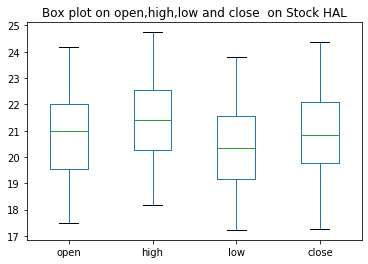

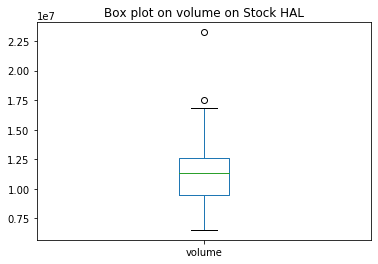

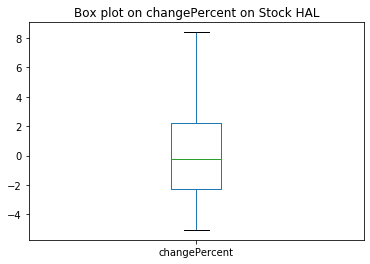

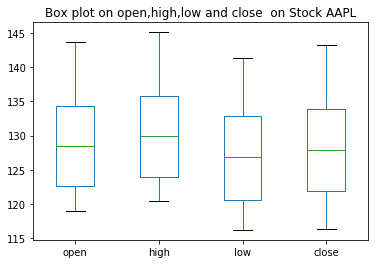

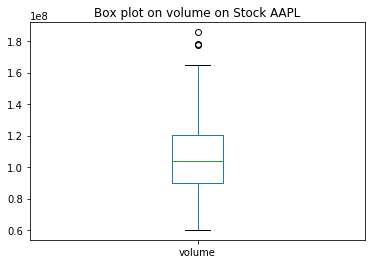

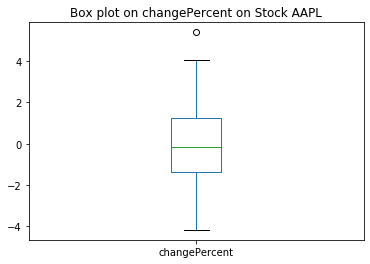

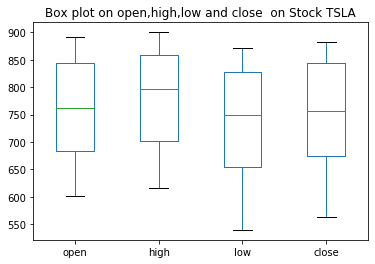

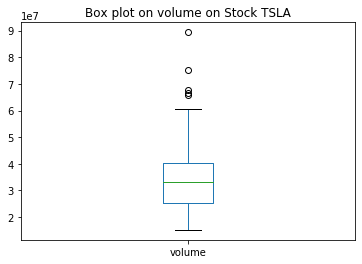

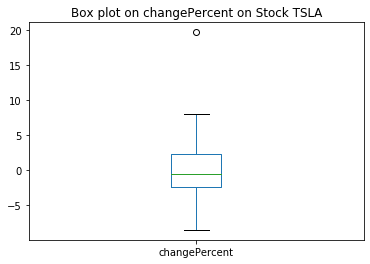

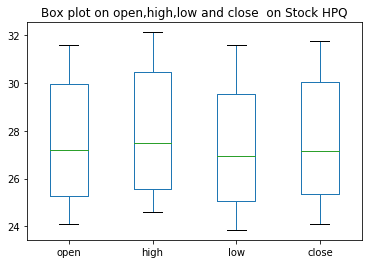

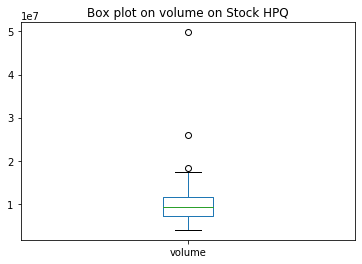

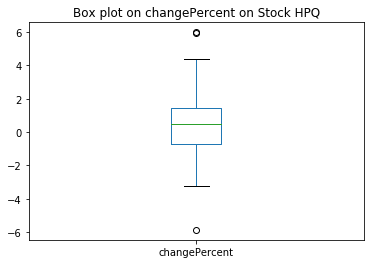

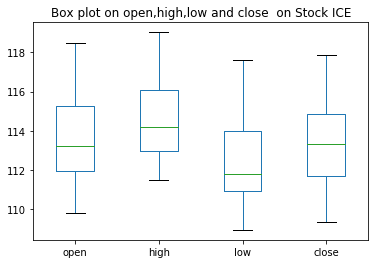

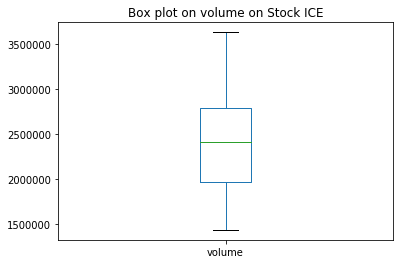

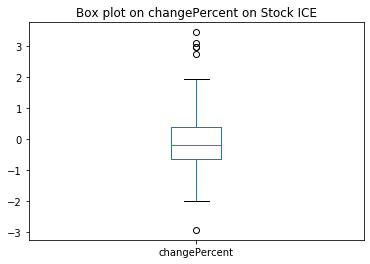

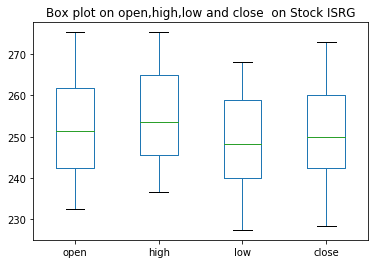

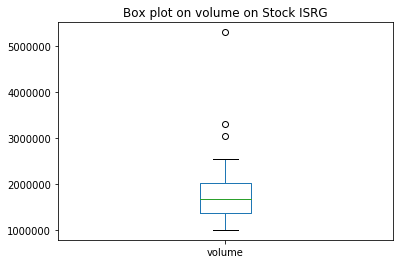

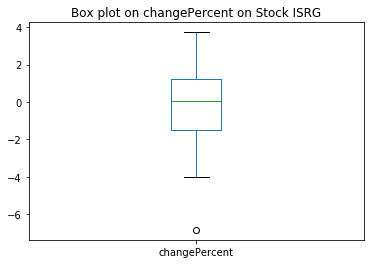

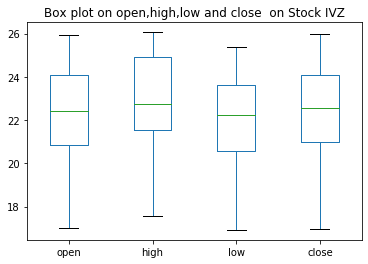

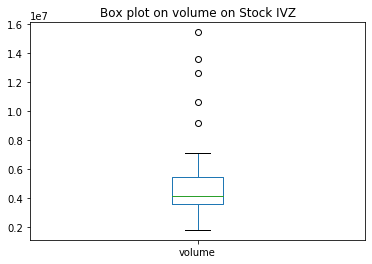

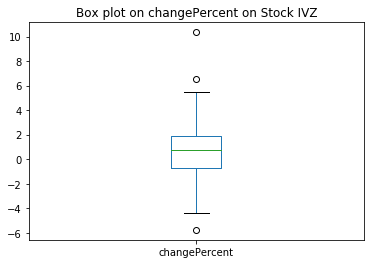

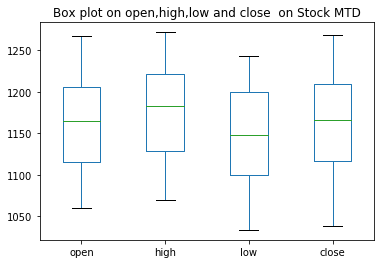

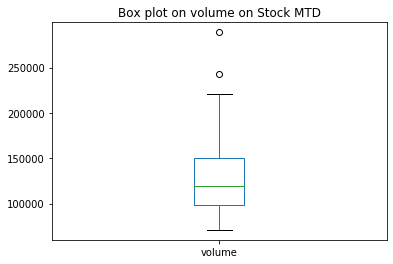

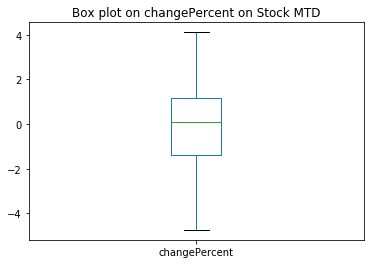

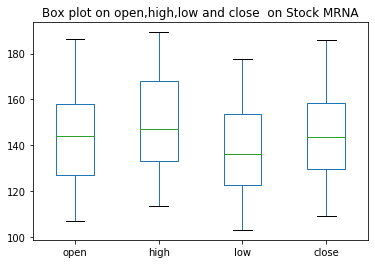

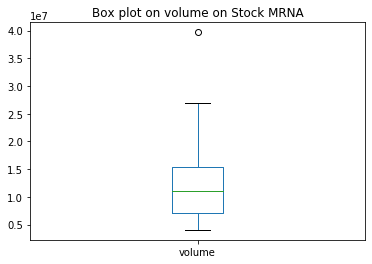

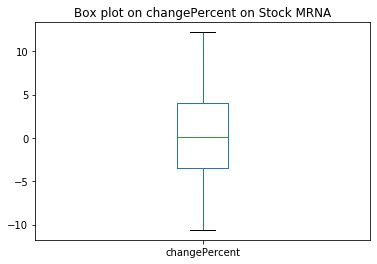

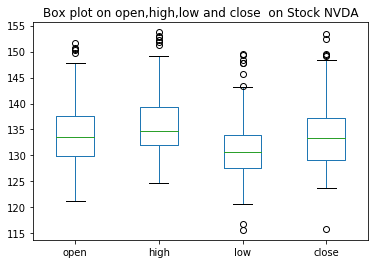

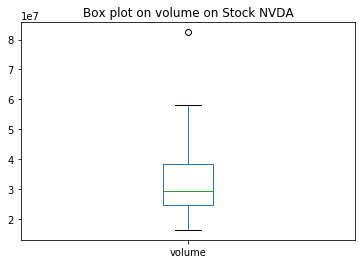

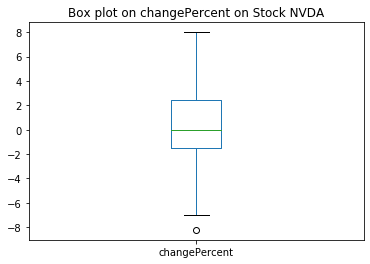

In [20]:
#we have the box plot for the variables of each stock separately
stocks_dict={}
for stock in stocks:
    stocks_dict[stock]= Saved_df[Saved_df['symbol'].str.contains(stock)]
    
    stocks_dict[stock][['open','high','low','close']].plot.box()
    s= "Box plot on open,high,low and close  on Stock "+ stock
    plt.title(s)
    plt.show()
    stocks_dict[stock]['volume'].plot.box()
    s="Box plot on volume on Stock "+ stock
    plt.title(s)
    plt.show()
    stocks_dict[stock]['changePercent'].plot.box()
    s="Box plot on changePercent on Stock "+ stock
    plt.title(s)
    plt.show()


### Findings and conclusions - 
We can observe that in all the stocks that are no outliers in the close, open, high and low variables. While in the volume and changePercent variables there are some outliers in most of the stocks. Volume seems to have more outliers in most of the stocks than changePercent.

## Variable normalization

In [21]:
#lets first observe the statistics of the original dataframe
copy_df=new_df.copy()
new_df.describe()

,open,close,high,low,volume,changePercent,symbol_HAL,symbol_HPQ,symbol_ICE,symbol_ISRG,...,companyName_Halliburton Co.,companyName_Intercontinental Exchange Inc,companyName_Intuitive Surgical Inc,companyName_Invesco Ltd,"companyName_Mettler-Toledo International, Inc.",companyName_Moderna Inc,companyName_NVIDIA Corp,companyName_Tesla Inc,sector_Manufacturing,"sector_Mining, Quarrying, and Oil and Gas Extraction"
count,610.000000,610.000000,610.00000,610.000000,6.100000e+02,610.000000,610.000000,610.000000,610.000000,610.000000,...,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,275.907033,275.580574,280.89541,270.780426,2.231142e+07,0.165230,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.700000,0.100000
std,360.705523,360.386105,366.59620,355.119397,3.371302e+07,3.010557,0.300246,0.300246,0.300246,0.300246,...,0.300246,0.300246,0.300246,0.300246,0.300246,0.300246,0.300246,0.300246,0.458634,0.300246
min,17.030000,16.950000,17.56000,16.920000,7.085300e+04,-10.620000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.232500,27.195000,27.48500,26.932500,2.428028e+06,-1.370000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,128.680000,128.945000,131.17500,126.725000,9.170642e+06,0.050000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,251.392500,250.037500,253.61250,248.110000,2.538528e+07,1.610000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1267.440000,1268.800000,1271.67000,1242.870000,1.855495e+08,19.640000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
#we will then apply RobustScaling to open,close,high,low, changePercent and volume to handle 
#the outliers in the volume and changePercent
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, RobustScaler, Normalizer
scaler = RobustScaler()
scaler.fit(new_df[['open','close','high','low','volume','changePercent']])
new_df_scaled = scaler.transform(new_df[['open','close','high','low','volume','changePercent']])
new_df_scaled = pd.DataFrame(new_df_scaled, columns=new_df[['open','close','high','low','volume','changePercent']].columns)
new_df_scaled.describe()

,open,close,high,low,volume,changePercent
count,6.100000e+02,610.000000,610.000000,6.100000e+02,610.000000,6.100000e+02
mean,6.567944e-01,0.658023,0.662106,6.513114e-01,0.572402,3.866762e-02
std,1.609143e+00,1.617223,1.621192,1.605586e+00,1.468513,1.010254e+00
min,-4.980817e-01,-0.502575,-0.502438,-4.964565e-01,-0.396380,-3.580537e+00
25%,-4.525674e-01,-0.456601,-0.458547,-4.511874e-01,-0.293703,-4.765101e-01
50%,-6.339872e-17,0.000000,0.000000,3.213304e-17,0.000000,-1.301043e-18
75%,5.474326e-01,0.543399,0.541453,5.488126e-01,0.706297,5.234899e-01
max,5.080121e+00,5.115070,5.043593,5.046377e+00,7.682925,6.573826e+00


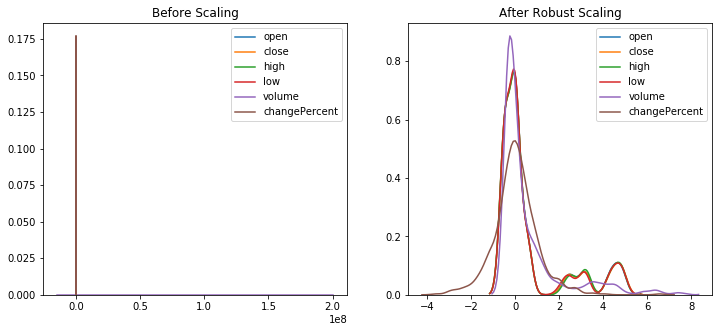

In [23]:
#let's compare the variable distributions before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling using kdeplot
ax1.set_title('Before Scaling')
sns.kdeplot(new_df['open'], ax=ax1)
sns.kdeplot(new_df['close'], ax=ax1)
sns.kdeplot(new_df['high'], ax=ax1)
sns.kdeplot(new_df['low'], ax=ax1)
sns.kdeplot(new_df['volume'], ax=ax1)
sns.kdeplot(new_df['changePercent'], ax=ax1)


# after scaling using kdeplot
ax2.set_title('After Robust Scaling')
sns.kdeplot(new_df_scaled['open'], ax=ax2)
sns.kdeplot(new_df_scaled['close'], ax=ax2)
sns.kdeplot(new_df_scaled['high'], ax=ax2)
sns.kdeplot(new_df_scaled['low'], ax=ax2)
sns.kdeplot(new_df_scaled['volume'], ax=ax2)
sns.kdeplot(new_df_scaled['changePercent'], ax=ax2)
plt.show()

In [24]:
#we now transfer the scaled columns to our original dataframe
new_df[['open','close','high','low','volume','changePercent']]= new_df_scaled[['open','close','high','low','volume','changePercent']]


### Findings and conclusions - Which feature was normalised and why? Which technique was used and why?
We normalized the close, open, high, low, volume and changePercent features because these were the numeric features which had different scales so we normalized them to have them all on a similar scale so that when we feed our data to ML model they are all on the same scale, rather than just only normalizing the most significantly different feature which was the volume. We used the technique of the Robust Scaling to handle the outliers in the volume and changePercent features.

## Bonus - Dashboard
In this section I added screenshots to the notebook displaying the GUI (dashboard) produced after running the code. If you want to see it yourself you need to run the code to display the dashboard (GUI) that contains the plots.

### Average closing price per week

### Average change per week

### Average volume per week

### Average closing price per week of each stock

### Average closing price of each sector

In [ ]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
root= tk.Tk() 
root2=tk.Tk()

stocks_dict={}
for stock in stocks:
    stocks_dict[stock]= copy_df[Saved_df['symbol'].str.contains(stock)]
    
def Task1(stock1,stock2):
    figure1 = plt.Figure(figsize=(4,4), dpi=100)
    ax1 = figure1.add_subplot(111)
    bar1 = FigureCanvasTkAgg(figure1, root)
    bar1.get_tk_widget().grid(row=0,column=0)
    df1 = stocks_dict[stock1].groupby('Week_number')['close'].mean()
    df1.plot(kind='bar', legend=True, ax=ax1)
    s1='Average close price per week for stock '+stock1
    ax1.set_title(s1)
    ax1.set_xlabel('Week number')

    figure2 = plt.Figure(figsize=(4,4), dpi=100)
    ax2 = figure2.add_subplot(111)
    line2 = FigureCanvasTkAgg(figure2, root)
    line2.get_tk_widget().grid(row=0,column=1)
    df2 = stocks_dict[stock2].groupby('Week_number')['close'].mean()
    df2.plot(kind='bar', legend=True, ax=ax2)
    s1='Average close price per week for stock '+stock2
    ax2.set_title(s1)
    ax2.set_xlabel('Week number')

    figure3 = plt.Figure(figsize=(4,4), dpi=100)
    ax3 = figure3.add_subplot(111)
    line3 = FigureCanvasTkAgg(figure3, root)
    line3.get_tk_widget().grid(row=0,column=2)
    df3 = stocks_dict[stock1].groupby('Week_number')['changePercent'].mean()
    df3.plot(kind='bar', legend=True, ax=ax3)
    s1='Average change per week for stock ' +stock1
    ax3.set_title(s1)
    ax3.set_xlabel('Week number')

    figure4 = plt.Figure(figsize=(4,4), dpi=100)
    ax4 = figure4.add_subplot(111)
    line4 = FigureCanvasTkAgg(figure4, root)
    line4.get_tk_widget().grid(row=1,column=0)
    df4 = stocks_dict[stock2].groupby('Week_number')['changePercent'].mean()
    df4.plot(kind='bar', legend=True, ax=ax4)
    s1='Average change per week for stock '+stock2
    ax4.set_title(s1)
    ax4.set_xlabel('Week number')

    figure5 = plt.Figure(figsize=(4,4), dpi=100)
    ax5 = figure5.add_subplot(111)
    line5 = FigureCanvasTkAgg(figure5, root)
    line5.get_tk_widget().grid(row=1,column=1)
    df5 = stocks_dict[stock1].groupby('Week_number')['volume'].mean()
    df5.plot(kind='bar', legend=True, ax=ax5)
    s1='Average volume per week for stock '+stock1
    ax5.set_title(s1)
    ax5.set_xlabel('Week number')

    figure6 = plt.Figure(figsize=(4,4), dpi=100)
    ax6 = figure6.add_subplot(111)
    line6 = FigureCanvasTkAgg(figure6, root)
    line6.get_tk_widget().grid(row=1,column=2)
    df6 = stocks_dict[stock2].groupby('Week_number')['volume'].mean()
    df6.plot(kind='bar', legend=True, ax=ax6)
    s1='Average volume per week for stock '+stock2
    ax6.set_title(s1)
    ax6.set_xlabel('Week number')
    

def Task2():
    figure1 = plt.Figure(figsize=(4,4), dpi=80)
    ax1 = figure1.add_subplot(111)
    bar1 = FigureCanvasTkAgg(figure1, root2)
    bar1.get_tk_widget().pack(side='left',expand=True,fill='both')
    df1 = Saved_df.groupby('sector')['close'].mean()
    df1.plot(kind='bar', legend=True, ax=ax1)
   
    ax1.set_title('Average closing price of each sector')
    ax1.set_xlabel('sector',size=30)
    ax1.tick_params(axis='x',rotation=10,size=5)
    
#expand the generated window to see full results
Task1('HAL','AAPL')
Task2()
root.mainloop()
root2.mainloop()

# These are the screenshots for the Dashboard generated by the above code

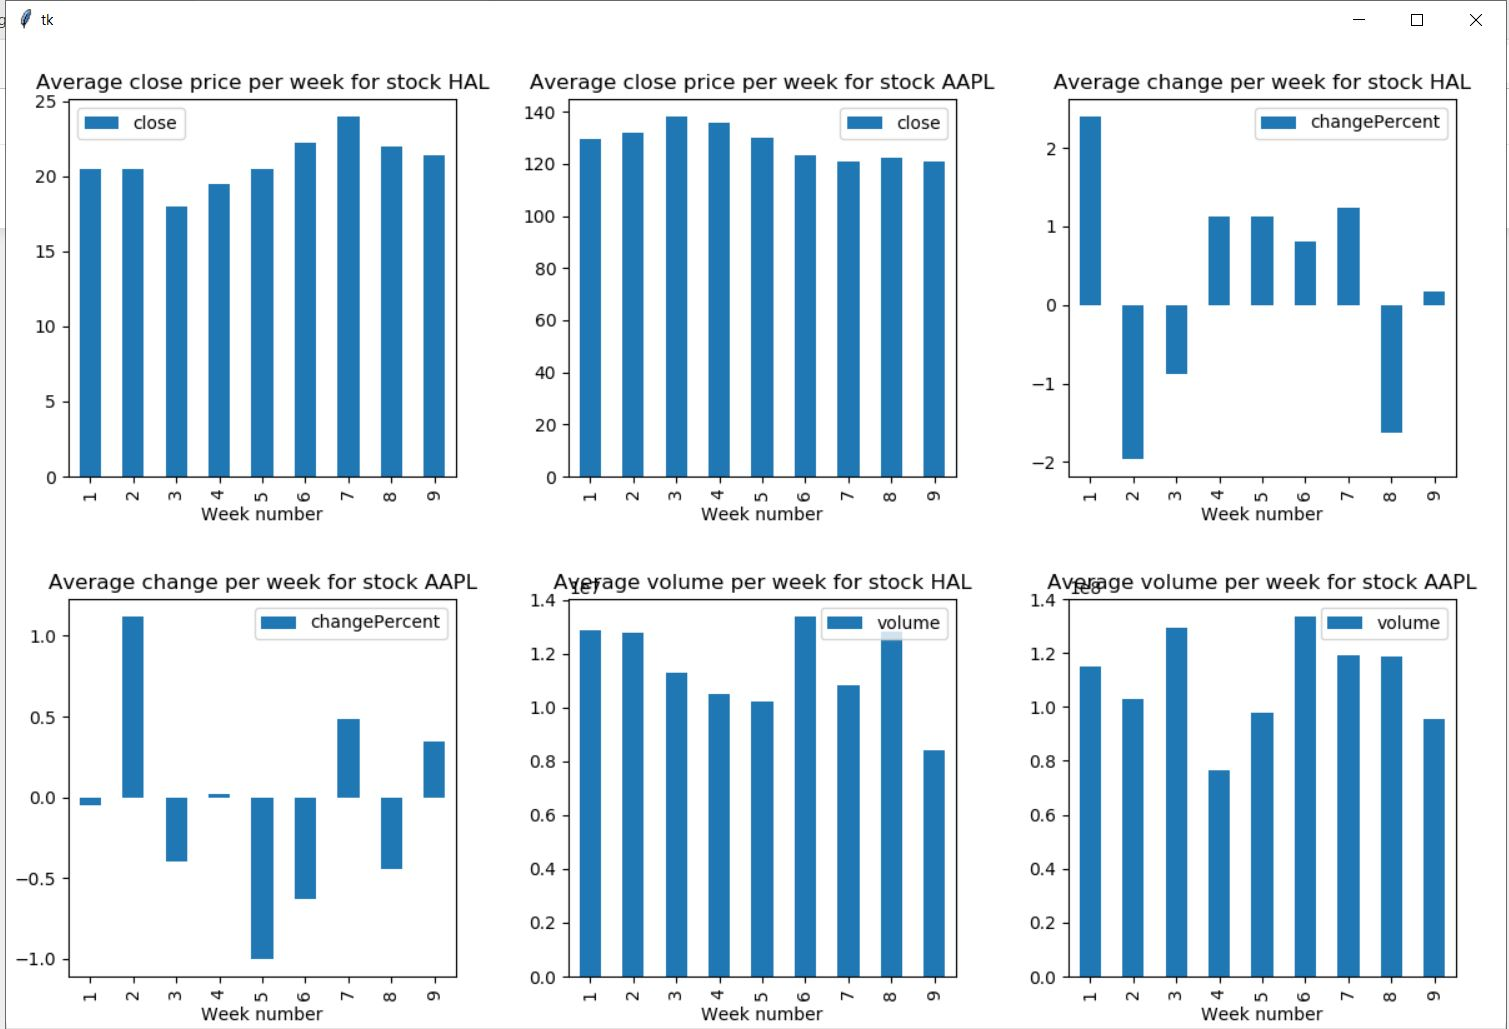

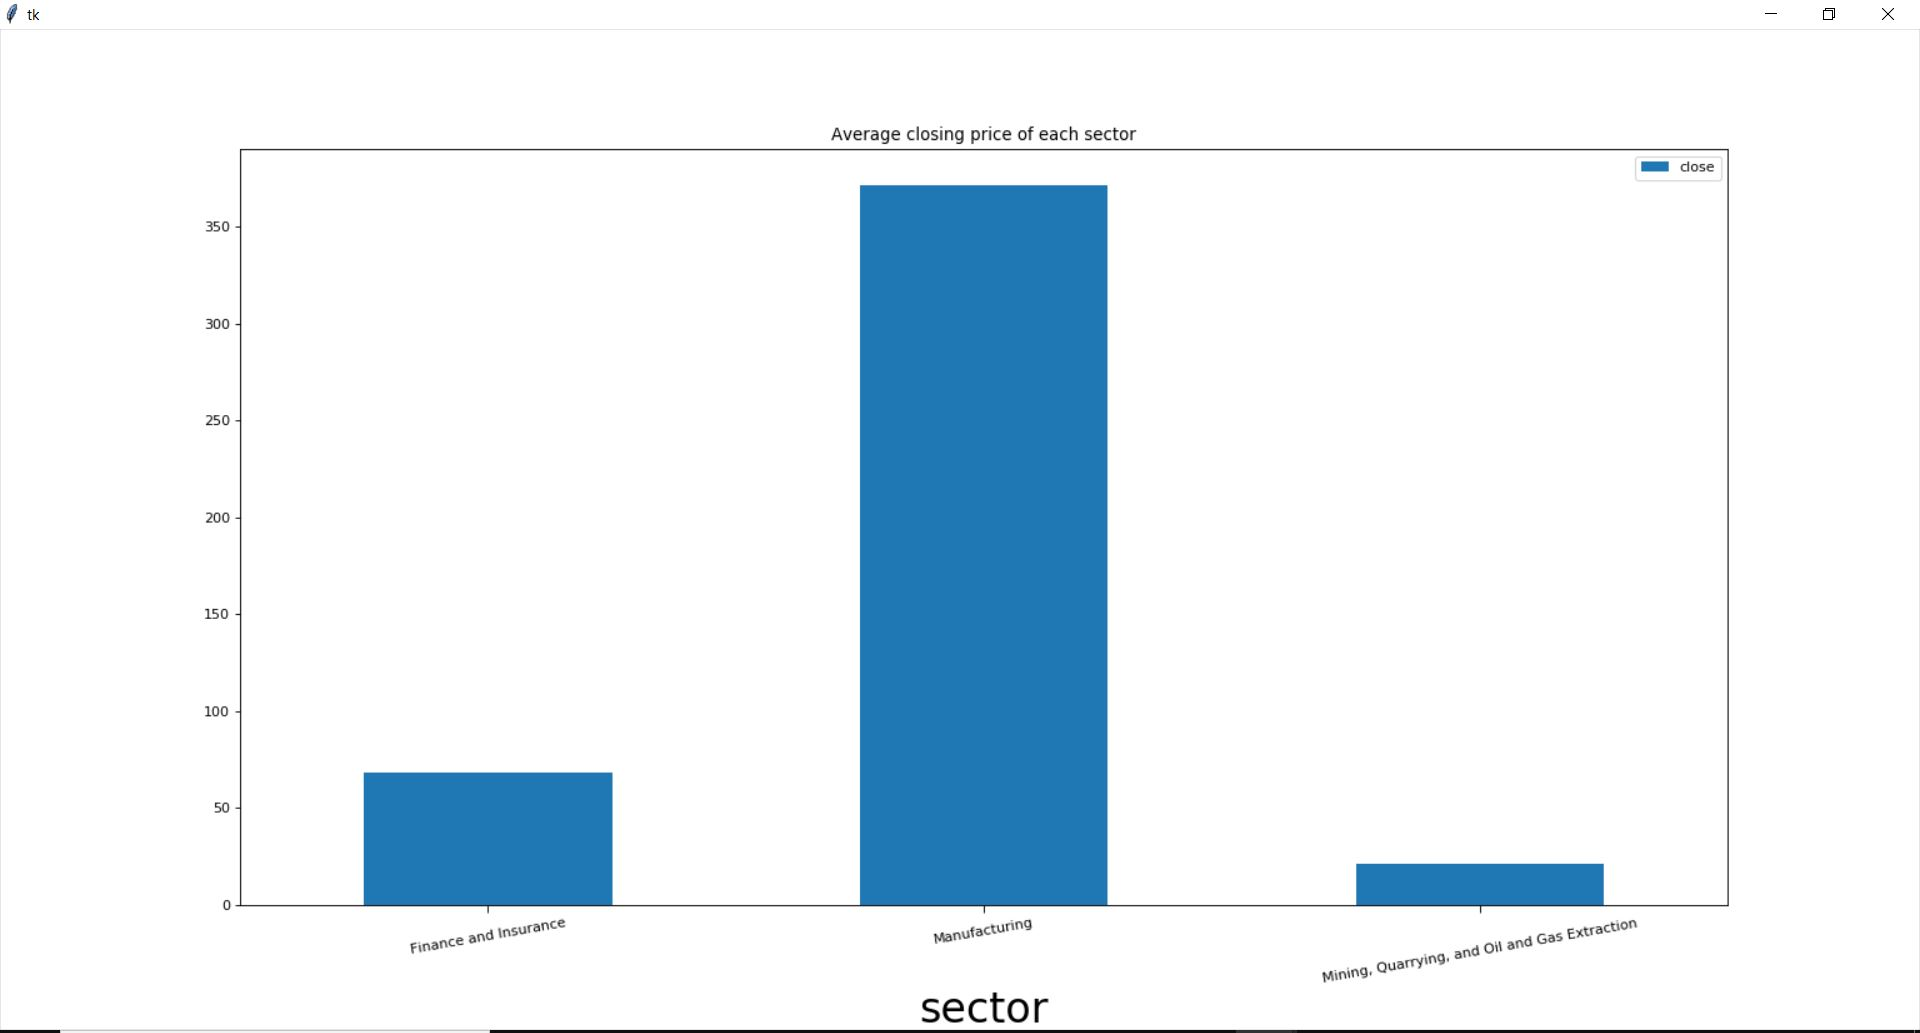